In [3]:
import pandas as pd
df = pd.read_csv("Google_Stock_Train (2010-2023).csv")

In [4]:
from sqlalchemy import create_engine
from urllib.parse import quote_plus

# Connection details
username = "root"
password = "sourov11@T"    # has '@' so needs encoding
host = "localhost"
port = "3306"
database = "google_stock"

# Encode special characters in password
password_encoded = quote_plus(password)

# Correct MySQL engine
engine = create_engine(
    f"mysql+pymysql://{username}:{password_encoded}@{host}:{port}/{database}",
    echo=True
)

# Load DataFrame to MySQL
table_name = "stock"
df.to_sql(table_name, con=engine, if_exists="replace", index=False)

print(f"Data loaded successfully into '{table_name}' table.")


2025-12-06 12:28:23,697 INFO sqlalchemy.engine.Engine SELECT DATABASE()
2025-12-06 12:28:23,697 INFO sqlalchemy.engine.Engine [raw sql] {}
2025-12-06 12:28:23,712 INFO sqlalchemy.engine.Engine SELECT @@sql_mode
2025-12-06 12:28:23,712 INFO sqlalchemy.engine.Engine [raw sql] {}
2025-12-06 12:28:23,712 INFO sqlalchemy.engine.Engine SELECT @@lower_case_table_names
2025-12-06 12:28:23,712 INFO sqlalchemy.engine.Engine [raw sql] {}
2025-12-06 12:28:23,712 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-12-06 12:28:23,723 INFO sqlalchemy.engine.Engine DESCRIBE `google_stock`.`stock`
2025-12-06 12:28:23,724 INFO sqlalchemy.engine.Engine [raw sql] {}
2025-12-06 12:28:23,752 INFO sqlalchemy.engine.Engine 
CREATE TABLE stock (
	`Date` TEXT, 
	`Open` FLOAT(53), 
	`High` FLOAT(53), 
	`Low` FLOAT(53), 
	`Close` FLOAT(53), 
	`Adj Close` FLOAT(53), 
	`Volume` BIGINT
)


2025-12-06 12:28:23,753 INFO sqlalchemy.engine.Engine [no key 0.00135s] {}
2025-12-06 12:28:23,903 INFO sqlalchemy.engine.Engine

In [2]:
# Data Cleaning & Manipulation step-by-step for the provided CSV
import pandas as pd
import numpy as np
from pathlib import Path

# Load
path = "Google_Stock_Train (2010-2023).csv"
df = pd.read_csv(path)

# 1) Convert Date to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df = df.sort_values('Date').reset_index(drop=True)
df.set_index('Date', inplace=True)

In [4]:
# 2) Create new columns
df['Daily_Return'] = df['Close'].pct_change()  # fractional change
df['High_Low_Range'] = df['High'] - df['Low']
df['Price_Momentum_7d'] = df['Close'] - df['Close'].shift(7)

In [10]:
# 3) Resample weekly and monthly series (aggregations)
weekly = df.resample('W').agg({
    'Open':'first','High':'max','Low':'min','Close':'last','Adj Close':'last','Volume':'sum',
    'Daily_Return':'mean','High_Low_Range':'mean','Price_Momentum_7d':'last'
}).dropna()

monthly = df.resample('ME').agg({
    'Open':'first','High':'max','Low':'min','Close':'last','Adj Close':'last','Volume':'sum',
    'Daily_Return':'mean','High_Low_Range':'mean','Price_Momentum_7d':'last'
}).dropna()

In [16]:
# Display results normally
print("Cleaned Data:")
display(df.head())

Cleaned Data:


,Open,High,Low,Close,Adj Close,Volume,Daily_Return,High_Low_Range,Price_Momentum_7d
Date,,,,,,,,,
2010-01-04,15.689439,15.753504,15.621622,15.684434,15.684434,78169752,NaN,0.131882,NaN
2010-01-05,15.695195,15.711712,15.554054,15.615365,15.615365,120067812,-0.004404,0.157658,NaN
2010-01-06,15.662162,15.662162,15.174174,15.221722,15.221722,158988852,-0.025209,0.487988,NaN
2010-01-07,15.250250,15.265265,14.831081,14.867367,14.867367,256315428,-0.023280,0.434184,NaN
2010-01-08,14.814815,15.096346,14.742492,15.065566,15.065566,188783028,0.013331,0.353854,NaN


In [14]:
print("Weekly:")
display(weekly.head())

Weekly:


,Open,High,Low,Close,Adj Close,Volume,Daily_Return,High_Low_Range,Price_Momentum_7d
Date,,,,,,,,,
2010-01-17,15.126627,15.126627,14.361862,14.514515,14.514515,1128366504,-0.007387,0.310160,-0.707207
2010-01-24,14.544545,14.775275,13.384885,13.764014,13.764014,826192980,-0.012815,0.470032,-1.012763
2010-01-31,13.678428,13.760761,13.153403,13.261762,13.261762,803571624,-0.007371,0.359360,-1.263013
2010-02-07,13.378378,13.566066,13.074575,13.295546,13.295546,634556808,0.000622,0.251301,-0.270520
2010-02-14,13.325826,13.563564,13.205455,13.341341,13.341341,514608876,0.000699,0.223574,-0.192693


In [15]:
print("Monthly:")
display(monthly.head())

Monthly:


,Open,High,Low,Close,Adj Close,Volume,Daily_Return,High_Low_Range,Price_Momentum_7d
Date,,,,,,,,,
2010-01-31,15.689439,15.753504,13.153403,13.261762,13.261762,3560455980,-0.009145,0.357542,-1.263013
2010-02-28,13.378378,13.701201,13.013013,13.183183,13.183183,2079290628,-0.000261,0.218942,-0.285536
2010-03-31,13.243243,14.721722,13.206707,14.192192,14.192192,3347637012,0.003283,0.245028,0.240741
2010-04-30,14.298048,14.960961,13.038789,13.155656,13.155656,2919517560,-0.003417,0.247807,-0.715715
2010-05-31,13.175676,13.336336,11.511512,12.152903,12.152903,3259185552,-0.003710,0.395783,-0.220220


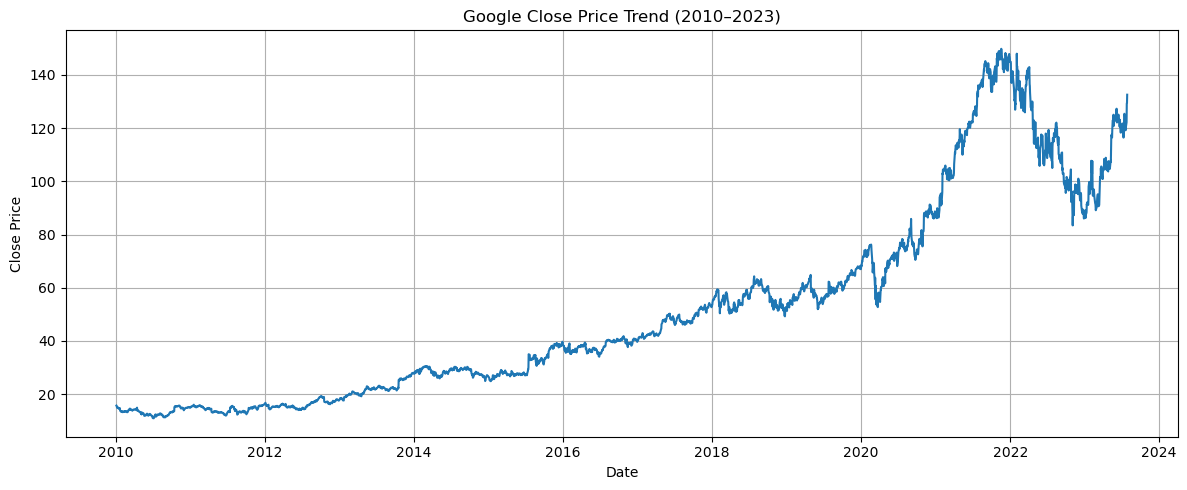

In [18]:
import matplotlib.pyplot as plt
# 1) Close Price trend (2010-2023)
plt.figure(figsize=(12,5))
plt.plot(df.index, df['Close'])
plt.title('Google Close Price Trend (2010–2023)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
print(df.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Daily_Return',
       'High_Low_Range', 'Price_Momentum_7d'],
      dtype='object')


In [24]:
df['MA_30'] = df['Close'].rolling(window=30, min_periods=1).mean()

In [25]:
print(df.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Daily_Return',
       'High_Low_Range', 'Price_Momentum_7d', 'MA_30'],
      dtype='object')


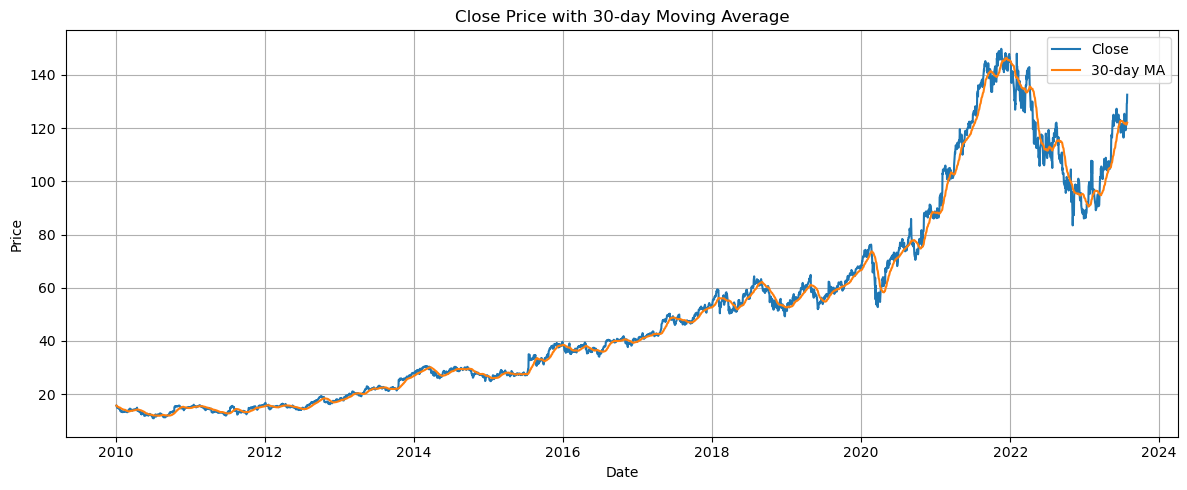

In [27]:
# 2) Close Price with 30-day Moving Average
plt.figure(figsize=(12,5))
plt.plot(df.index, df['Close'], label='Close')
plt.plot(df.index, df['MA_30'], label='30-day MA')
plt.title('Close Price with 30-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

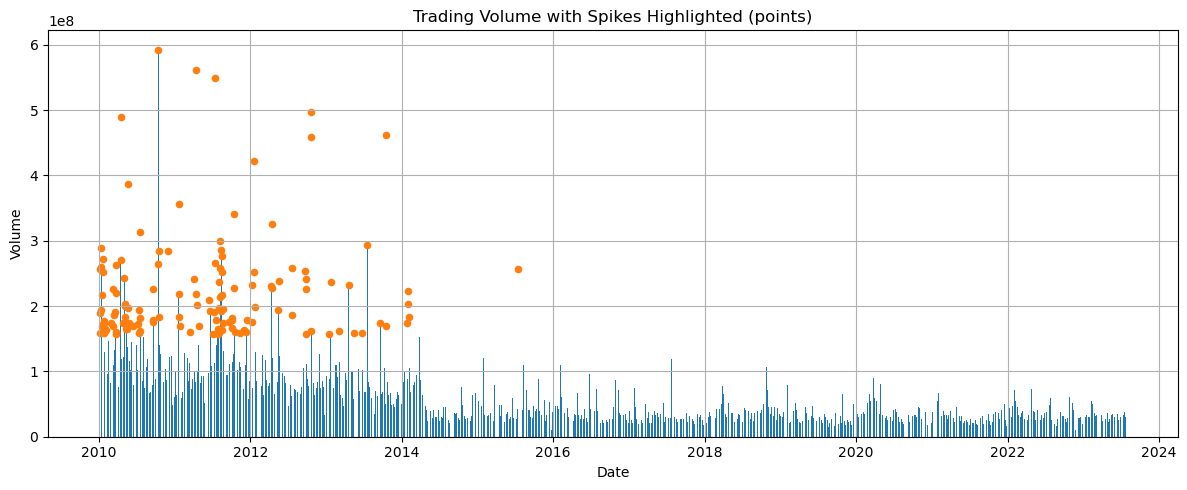

In [28]:
# 3) Trading Volume with spikes highlighted
vol_mean = df['Volume'].mean()
vol_std = df['Volume'].std()
threshold = vol_mean + 2 * vol_std  # define spike as > mean + 2*std
spikes = df['Volume'] > threshold

plt.figure(figsize=(12,5))
plt.bar(df.index, df['Volume'])
# overlay spike markers
plt.scatter(df.index[spikes], df['Volume'][spikes], s=20)
plt.title('Trading Volume with Spikes Highlighted (points)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

In [46]:
# | Parameter | Meaning = ARIMA is a classical time-series model that uses past values
# and past errors to forecast future values. It works best on stationary data and is often used for short-term forecasting.                                             |

# | p | Number of AR terms (how many past values to use)           |
# | d | Number of differences needed to make the series stationary |
# | q | Number of MA terms (how many past forecast errors to use)  |


In [30]:
# Feature engineering
df['Return'] = df['Close'].pct_change()
for lag in range(1, 8):  # lag1..lag7 returns
    df[f'return_lag_{lag}'] = df['Return'].shift(lag)

df['ma_7'] = df['Close'].rolling(7).mean()
df['ma_30'] = df['Close'].rolling(30).mean()
df['vol_7'] = df['Return'].rolling(7).std()
df['vol_30'] = df['Return'].rolling(30).std()
df['momentum_7'] = df['Close'] - df['Close'].shift(7)
df['volume_change'] = df['Volume'].pct_change()
df['dayofweek'] = df.index.dayofweek
df['month'] = df.index.month

In [31]:
# Target for classification: next-day positive return
df['next_close'] = df['Close'].shift(-1)
df['next_pos'] = (df['next_close'] > df['Close']).astype(int)

In [32]:
# Drop rows with NaNs in features/target
feature_cols = [c for c in df.columns if c.startswith('return_lag_') or c in 
                ['ma_7','ma_30','vol_7','vol_30','momentum_7','volume_change','dayofweek','month']]
model_df = df.dropna(subset=feature_cols + ['next_pos']).copy()

In [33]:
# Train-test split (time-based): train until end of 2021, test 2022-2023
train_end = '2021-12-31'
train = model_df.loc[:train_end]
test = model_df.loc[train_end:]
if test.empty:
    # fallback: last 20% as test
    split_idx = int(len(model_df)*0.8)
    train = model_df.iloc[:split_idx]
    test = model_df.iloc[split_idx:]

X_train = train[feature_cols]
y_train = train['next_pos']
X_test = test[feature_cols]
y_test = test['next_pos']

In [34]:
# RandomForest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, digits=4, output_dict=True)
conf = confusion_matrix(y_test, y_pred)

In [35]:
# Feature importance
feat_imp = pd.Series(rf.feature_importances_, index=feature_cols).sort_values(ascending=False)

# ARIMA forecasting on Close
# Use data up to end of 2022 for ARIMA training, then forecast next 30 days
arima_train_end = '2022-12-31'
arima_train = df['Close'].loc[:arima_train_end]
if arima_train.shape[0] < 50:
    arima_train = df['Close']  # fallback

In [36]:
# Fit ARIMA (order chosen as (5,1,0) simple choice)
arima_model = ARIMA(arima_train, order=(5,1,0))
arima_res = arima_model.fit()

# Forecast next 60 calendar periods (trading days approximation)
steps = 60
arima_forecast = arima_res.forecast(steps=steps)
forecast_index = pd.date_range(start=arima_train.index[-1] + pd.Timedelta(days=1), periods=steps, freq='D')

In [37]:
# Prepare outputs and plots
results = {
    'classifier_accuracy': acc,
    'classification_report': report,
    'confusion_matrix': conf.tolist(),
    'top_features': feat_imp.head(10).to_dict(),
    'arima_summary_aic': float(getattr(arima_res, 'aic', np.nan))
}

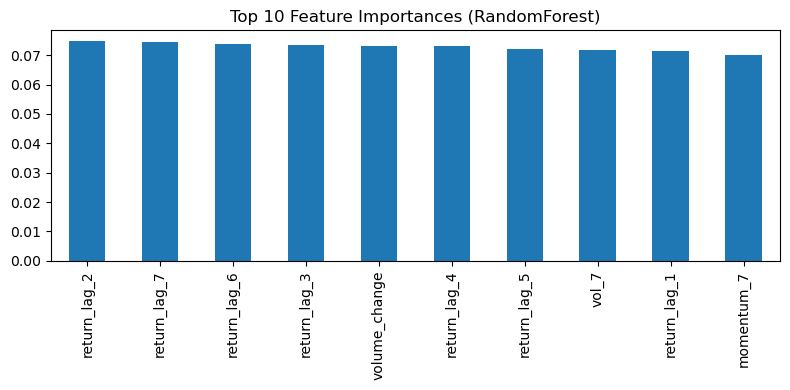

In [38]:
# Plot classifier feature importance
plt.figure(figsize=(8,4))
feat_imp.head(10).plot(kind='bar')
plt.title('Top 10 Feature Importances (RandomForest)')
plt.tight_layout()
plt.show()

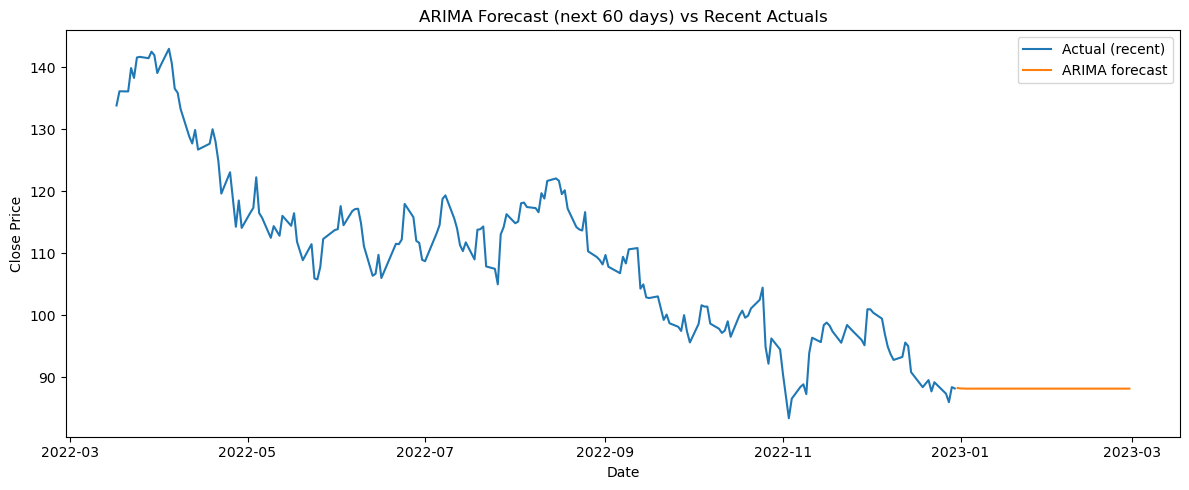

In [39]:
# Plot ARIMA forecast vs recent actuals
plt.figure(figsize=(12,5))
plt.plot(arima_train.index[-200:], arima_train[-200:], label='Actual (recent)')
plt.plot(forecast_index, arima_forecast, label='ARIMA forecast')
plt.title('ARIMA Forecast (next 60 days) vs Recent Actuals')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.tight_layout()
plt.show()

In [40]:
# Confusion matrix heatmap-like print
conf_df = pd.DataFrame(conf, index=['Actual_0','Actual_1'], columns=['Pred_0','Pred_1'])

In [43]:
print("Top feature importances:")
display(feat_imp.reset_index().rename(columns={'index': 'feature', 0: 'importance'}).head(20))

Top feature importances:


,feature,importance
0,return_lag_2,0.074733
1,return_lag_7,0.074394
2,return_lag_6,0.073911
3,return_lag_3,0.073619
4,volume_change,0.073258
5,return_lag_4,0.073122
6,return_lag_5,0.072005
7,vol_7,0.071788
8,return_lag_1,0.071429
9,momentum_7,0.069924


In [44]:
print("\nConfusion matrix:")
display(conf_df.reset_index())


Confusion matrix:


,index,Pred_0,Pred_1
0,Actual_0,58,146
1,Actual_1,55,136


In [45]:
# Show a small sample of ARIMA forecast
forecast_sample = pd.DataFrame({'date': forecast_index, 'forecast': np.round(arima_forecast,2)}).head(12)

forecast_sample, results

(           date  forecast
 3272 2022-12-31     88.30
 3273 2023-01-01     88.23
 3274 2023-01-02     88.23
 3275 2023-01-03     88.19
 3276 2023-01-04     88.20
 3277 2023-01-05     88.20
 3278 2023-01-06     88.20
 3279 2023-01-07     88.20
 3280 2023-01-08     88.20
 3281 2023-01-09     88.20
 3282 2023-01-10     88.20
 3283 2023-01-11     88.20,
 {'classifier_accuracy': 0.4911392405063291,
  'classification_report': {'0': {'precision': 0.5132743362831859,
    'recall': 0.28431372549019607,
    'f1-score': 0.3659305993690852,
    'support': 204.0},
   '1': {'precision': 0.48226950354609927,
    'recall': 0.7120418848167539,
    'f1-score': 0.5750528541226215,
    'support': 191.0},
   'accuracy': 0.4911392405063291,
   'macro avg': {'precision': 0.49777191991464254,
    'recall': 0.498177805153475,
    'f1-score': 0.4704917267458534,
    'support': 395.0},
   'weighted avg': {'precision': 0.49828212602297434,
    'recall': 0.4911392405063291,
    'f1-score': 0.4670504744524407,
    